# Flying-Fox On The Run

<br>
<footer>Amanda McGilchrist</footer

<img src="grey headed flyingfox.png" alt="flyingfox image" width="400px" style="float:right">

<div>The flying-fox monitoring program was implemented to collect information on the abundance and distribution of the flying-fox population in eastern Australia. The data provides an indication into population trends and other ecological factors. The monitoring of flying-foxes is especially important as two species, the grey-headed flying-fox and the spectacled flying-fox, are listen as threatened under the Commonwealth Environmental Protection and Biodiversity Conservation Act 1999.

The Australian Government put $6 million towards Hendra Virus Research. Hendra virus is a bat-borne virus that affected horses, which then can be passed onto people, so the monitoring of flying-foxes also helps inform response to concerns about potential Hendra outbreaks</div>

<p style="font-size: 24px">The datasets describe Queensland’s known flying-fox roosts and the magnitude of flying-foxes by species.</p>

  <div style="align=center">
  <div style="float: left; width: 20%; padding: 5px; align-items: center;">
    <img src="blackfox.png" alt="black flying fox" style="width:100%">
    <p style="font-size: 11px; text-align: center">Black Flying-fox</p>
  </div>
  <div style="float: left; width: 20%; padding: 5px; align-items: center;">
    <img src="grey-headed-flying-foxes.png" alt="Greyheaded flying-fox" style="width:100%">
    <p style="font-size: 11px; text-align: center">Grey Headed Flying-fox</p>
  </div>
  <div style="float: left; width: 20%; padding: 5px; align-items: center;">
    <img src="little red.png" alt="Little red flying fox" style="width:100%">
    <p style="font-size: 11px; text-align: center">Little Red Flying-fox</p>
  </div>
   <div style="float: left; width: 20%; padding: 5px; align-items: center;">
    <img src="spectacled.png" alt="Spectacled Flying-fox" style="width:100%">
    <p style="font-size: 11px; text-align: center">Spectacled Flying-fox</p>
  </div>
    </div>

<p style="font-size: 24px">In the Flying-fox monitoring program, the flying-foxes at small camps are counted directly while area-based methods are used at larger camps. The counts were conducted at all known camps of the grey-headed flying-fox and the spectacled flying-fox. Counts were also carried out for Little red and Black flying-foxes within the regions.</p>

<div style="font-size:18px; vertical-align: bottom;">All datasets were retrieved from data.gov.au</div>

### Useful Information

##### What is a roost/camp
A roost or a camp is a patch of trees which flying-foxes are found in during the day.

I refer to it as a camp throughout the project

<h5>By using the data I want to explore</h5>
<ul>
<li>Where flying-foxes are mostly populated</li>

<li>How they are distributed throughout Queensland and the abundance of them</li>

<li>The change in population over time</li>
</ul>

#### I did some importing

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import glob
import geopandas as gp
import shapely
import fiona
import seaborn as sns
from matplotlib import cycler
from datetime import datetime
from matplotlib import rcParams
from shapely.geometry import Point
import datetime as dt
import matplotlib.patches as mpatches

#### And applied some style states

In [2]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (10, 10)
saved_style_state = matplotlib.rcParams.copy()

In [3]:
colors = cycler(color=['#4c72b0', '#dd8452', '#55a868', '#c44e52', '#8172b3', '#da8bc3'])
plt.rc('axes', prop_cycle=colors)

### Reading and joining datasets

In [4]:
dataframes = []
for f in os.listdir("fox"):
    print(f)
    df = pd.read_csv(os.path.join("fox", f), parse_dates=[4])
    dataframes.append(df)

fox_df = pd.concat(dataframes)

flying-fox-monitoring-apr-jul-2016.csv
flying-fox-monitoring-apr-jun-2017.csv
flying-fox-monitoring-apr-jun-2018.csv
flying-fox-monitoring-apr-jun-2019.csv
flying-fox-monitoring-jan-mar-2016.csv
flying-fox-monitoring-jan-mar-2017.csv
flying-fox-monitoring-jan-mar-2018.csv
flying-fox-monitoring-jan-mar-2019.csv
flying-fox-monitoring-jul-sep-2017.csv
flying-fox-monitoring-jul-sep-2018.csv
flying-fox-monitoring-jul-sep-2019.csv
flying-fox-monitoring-oct-dec-2016.csv
flying-fox-monitoring-oct-dec-2017.csv
flying-fox-monitoring-oct-dec-2018.csv
flying-fox-monitoring-oct-dec-2019.csv


### Shape of dataset

In [5]:
shape = fox_df.shape
print("Rows: " + str(shape[0]))
print("Columns: " + str(shape[1]))

foxlist = "Total number of black flying-fox", "Total number of Grey-headed flying-fox", "Total number of Little red flying-fox", "Total number of Spectacled flying-fox"
fox_df.columns

print("Each row in the data is one survey entry")

Rows: 1763
Columns: 13
Each row in the data is one survey entry


In [6]:
fox_df.sample(2)

,Name of local government,Name of camp,Latitude,Longitude,Date of survey,Flying-fox absent (true/false),Total number of black flying-fox,Total number of Grey-headed flying-fox,Total number of Little red flying-fox,Total number of Spectacled flying-fox,Total number of all species,EHP camp identification,CSIRO camp identification
66,Scenic Rim,Tamborine NP (Joalah Sec),-27.923700,153.19350,2017-08-18,False,0,2400.0,0,0,2400,150,455.0
26,Ipswich,"Bundamba, Paice St",-27.612423,152.81273,2018-02-16,False,300,300.0,400,0,1000,196,574.0


## General Overview of Where Flying-Foxes Are

In [7]:
fox_df_campclean = fox_df.drop_duplicates("Name of camp")

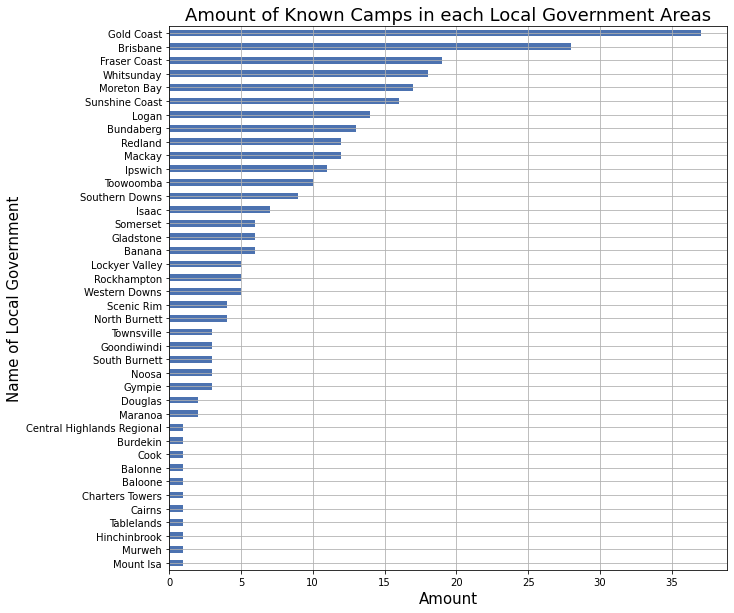

In [27]:
reversed_fox_df = fox_df_campclean["Name of local government"].value_counts().plot.barh()
reversed_fox_df.invert_yaxis()
plt.title("Amount of Known Camps in each Local Government Areas", fontsize=18)
plt.xlabel('Amount', fontsize=15)
plt.ylabel('Name of Local Government', fontsize=15)
plt.grid(True)
plt.show()

The gold coast and brisbane have the most known camps in Queensland. The 4 species of flying-foxes are commonly refered to as fruit bats as they eat nectar and pollen so urban areas have easy access to food.

##### Observations
<ul>
<li>Gold Coast has the most monitored camps</li>
<li>A lot of urban areas have camps</li>
</ul>

## Mapping the camps

So from this map I was curious about the distribution of the camps in Queensland.

##### Made Mapping of Queensland and City Points

In [10]:
zip_file_name = "maps\qld_locality_polygon_shp.zip"
shp_file_name = "QLD_LOCALITY_POLYGON_shp"
def unzip_zipfile(zipped_file_path, put_it_here="."):
    import zipfile
    zip_of_suburbs = zipfile.ZipFile(zipped_file_path, 'r')
    zip_of_suburbs.extractall(put_it_here)
    zip_of_suburbs.close()

map_file = unzip_zipfile(zip_file_name)

burbs = gp.GeoDataFrame.from_file(shp_file_name)
burbs.set_crs(epsg=5234, inplace=True, allow_override=True) 
burbs.head(7)

cols_to_drop = ["QLD_LOCA_1", "QLD_LOCA_3", "QLD_LOCA_4", "QLD_LOCA_6", "DT_RETIRE"]
burbs.drop(cols_to_drop, axis=1, inplace=True, errors="ignore")

In [11]:
qld_cities_df = pd.read_csv("queensland cities.csv")
qld_cities_df["Coordinates"] = list(zip(qld_cities_df.lng, qld_cities_df.lat))
qld_cities_df.head()
qld_cities_df["Coordinates"] = qld_cities_df["Coordinates"].apply(Point)
qld_cities_df.head()

qld_cities_gdf = gp.GeoDataFrame(qld_cities_df, geometry="Coordinates")

##### Creating point geometry from longitude and latitiude

In [20]:
fox_gdf = gp.GeoDataFrame(fox_df, geometry=gp.points_from_xy(fox_df.Longitude, fox_df.Latitude))

fox_gdf.head(3)

,Name of local government,Name of camp,Latitude,Longitude,Date of survey,Flying-fox absent (true/false),Total number of black flying-fox,Total number of Grey-headed flying-fox,Total number of Little red flying-fox,Total number of Spectacled flying-fox,Total number of all species,EHP camp identification,CSIRO camp identification,geometry
0,Redland,"Alexandra Hills, Lawn Terrace",-27.516490,153.209680,2016-05-20,False,800,200.0,0,0,1000,1,270.0,POINT (153.20968 -27.51649)
1,Southern Downs,Allora (Dalrymple Creek),-28.028018,151.983746,2016-05-20,False,350,0.0,0,0,350,2,271.0,POINT (151.98375 -28.02802)
2,Bundaberg,"Avoca, McCoys Creek",-24.887410,152.229360,2016-05-19,True,0,0.0,0,0,0,238,712.0,POINT (152.22936 -24.88741)


In [ ]:
fig, ax1 = plt.subplots(figsize=(10,10))
burbs.boundary.plot(ax=ax1, alpha=0.1, edgecolor='black') 

qldplot = qld_cities_gdf.plot('city', ax=ax1, markersize=1)

for x, y, label in zip(qld_cities_gdf['Coordinates'].x, qld_cities_gdf['Coordinates'].y, qld_cities_gdf['city']):
    qldplot.annotate(label, xy=(x, y), xytext=(20,0), textcoords="offset points", size=8, arrowprops=dict(arrowstyle="->"))
    if label == "Mount Isa":
        qldplot.annotate('Lake Moondarra', xy=(x,y), xycoords='data', xytext=(2, 10), textcoords='offset points', size=6)



fox_gdf.plot(ax=ax1, color="#4c72b0", markersize=100)

plt.title("Known Camp Locations", fontsize=25)
plt.xlabel('Longitude', fontsize=20)
plt.ylabel('Latitude', fontsize=20)

Geometry column made from longitude and latitude columns

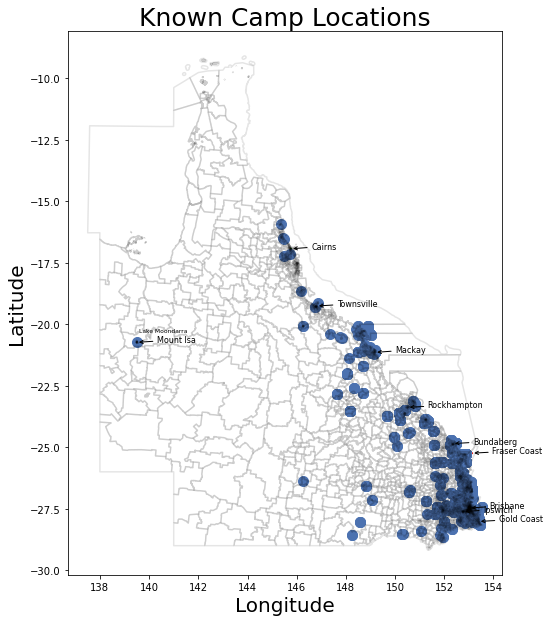

In [19]:
plt.show()

##### Observations
<ul>
<li>Mostly along the East coast</li>
<li>Near water sources</li>
<li>Flying-foxes like dense tree location like forests and swamps so the map indicates that either a forest or swamps could be there</li>
</ul>

From this map of the known camp locations you can see that they tend to stay near water sources so thats why they are mostly along the east coast. At the camp far from the east coast their is a lake that runs through it. 

Flying-foxes also like high density tree locations like forests and swamp, so the map is an indication of where those are.

## Distribution of Flying-fox species in each Local Government Area

From the map I was curious about the distribution of each flying fox species across these areas

In [ ]:
fox_df[["Name of local government","Total number of black flying-fox", "Total number of Grey-headed flying-fox", "Total number of Little red flying-fox", "Total number of Spectacled flying-fox"]].groupby("Name of local government").sum().plot(kind='bar', figsize=(40,10), width=.8)

plt.title("Distribution of species in local government areas over 2016-2019", fontsize=20)
plt.xlabel('Name of local government', fontsize=15)
plt.ylabel('Amount of Flying Foxes', fontsize=15)

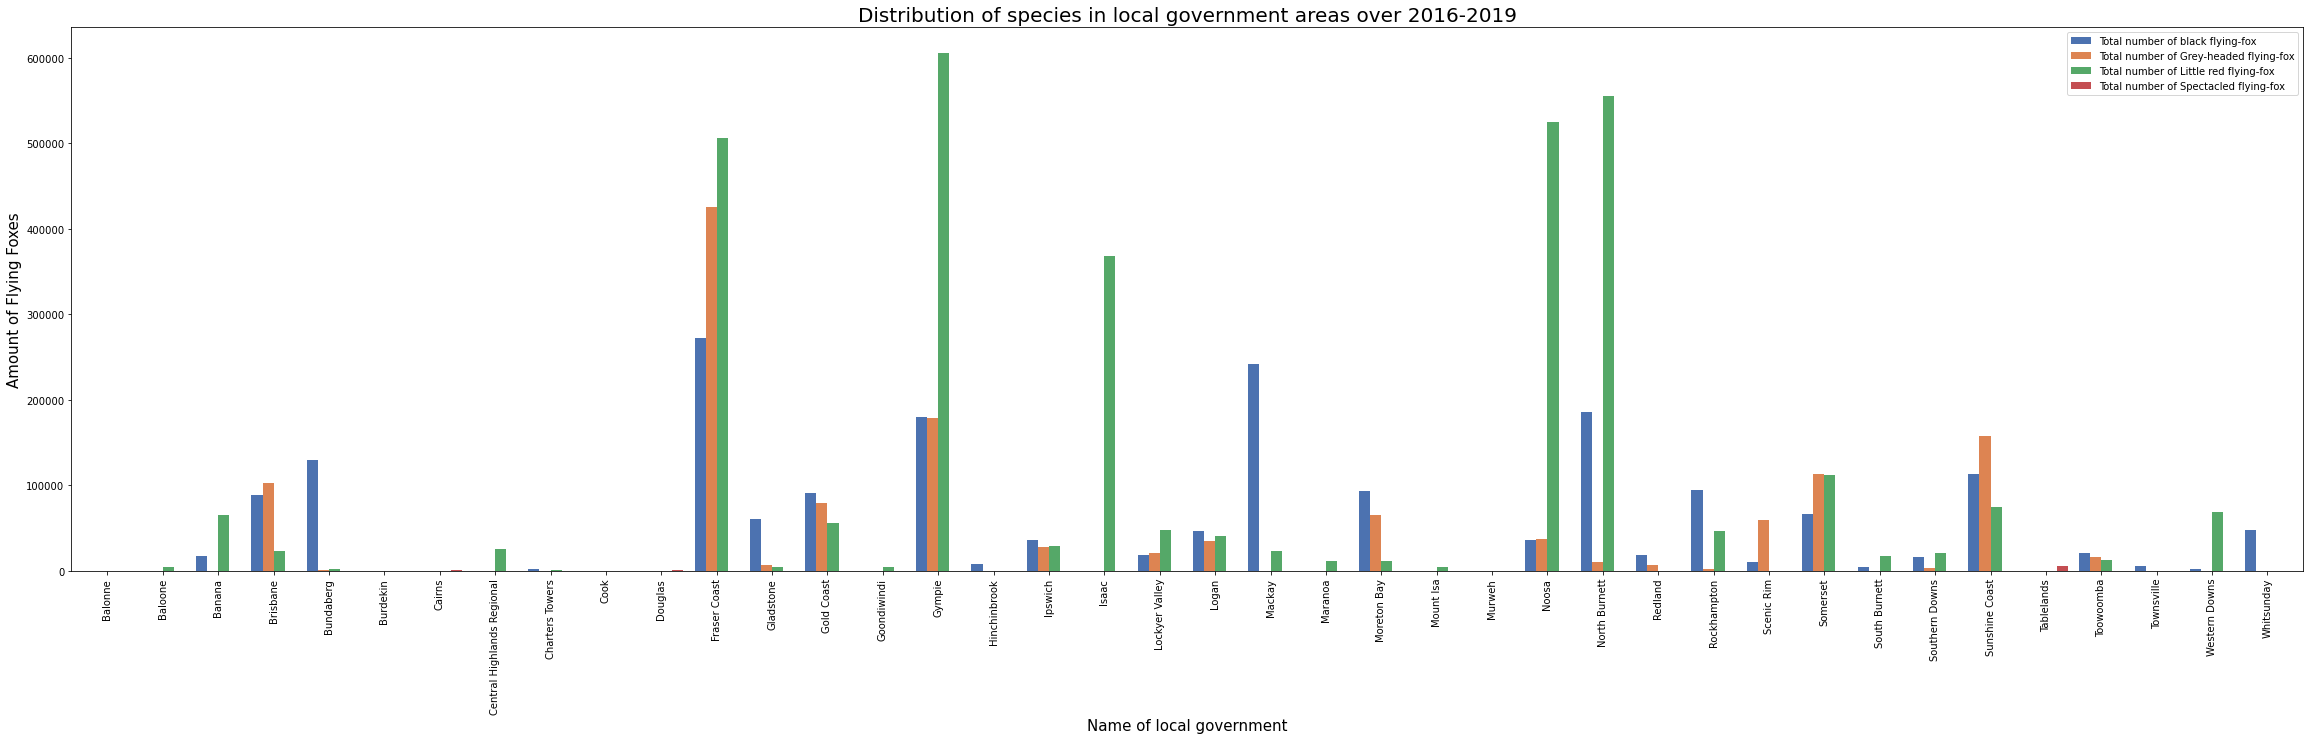

In [28]:
plt.show()

##### Observations
<ul style="font-size: 15px">
<li>Little Red and Black Flying-foxes are more common</li>
<li>Despite Gold Coast having the most camps they aren't as populated</li>
<li>LGA Isaac has 7 camps and only little red flying-foxes populate it</li>
</ul>

This bar graph describes the total number of each species across each LGA. You can see that despite the Gold coast having the most camps shown from the Bar graph and the map, other LGAs have more flying-foxes.
The graph shows the proportion of each species so there are quite a lot of Little red and barely any Spectacled flying foxes. I found it interesting that despite Grey-headed flying-foxes being considered threatened, some areas have more grey headed flyingfoxes compared to black flying foxes.
Another thing I found interesting is that the LGA Isaac has 7 camps but only little red flying-foxes are found in those

## Distribution of Flying-fox Species each year

I wanted to compare how these numbers change over the years 

##### Subset the dataframe by each year

In [31]:
index_fox_df = fox_df.set_index(pd.DatetimeIndex(fox_df['Date of survey']))
fox_df_2016 = index_fox_df.loc["2016"]
fox_df_2017 = index_fox_df.loc["2017"]
fox_df_2018 = index_fox_df.loc["2018"]
fox_df_2019 = index_fox_df.loc["2019"]


##### Group needed columns by each local government area

In [32]:
num2016 = fox_df_2016[["Name of local government","Total number of black flying-fox", "Total number of Grey-headed flying-fox", "Total number of Little red flying-fox", "Total number of Spectacled flying-fox"]].groupby("Name of local government").sum()
num2017 = fox_df_2017[["Name of local government","Total number of black flying-fox", "Total number of Grey-headed flying-fox", "Total number of Little red flying-fox", "Total number of Spectacled flying-fox"]].groupby("Name of local government").sum()
num2018 = fox_df_2018[["Name of local government","Total number of black flying-fox", "Total number of Grey-headed flying-fox", "Total number of Little red flying-fox", "Total number of Spectacled flying-fox"]].groupby("Name of local government").sum()
num2019 = fox_df_2019[["Name of local government","Total number of black flying-fox", "Total number of Grey-headed flying-fox", "Total number of Little red flying-fox", "Total number of Spectacled flying-fox"]].groupby("Name of local government").sum()

##### Create subplots to compare results of amount of flying foxes in each local government

In [ ]:
fig, axes = plt.subplots(2, 2, constrained_layout=True, sharey=False, figsize=(40,20))
ax1 = num2016.plot(kind="bar", ax=axes[0, 0], fontsize=15)
ax2 = num2017.plot(kind="bar", ax=axes[0, 1], fontsize=15)
ax3 = num2018.plot(kind="bar", ax=axes[1, 0], fontsize=15)
ax4 = num2019.plot(kind="bar", ax=axes[1, 1], fontsize=15)

ax1.set_ylabel("Amount of Flying-Foxes", fontsize=15)
ax2.set_ylabel("Amount of Flying-Foxes", fontsize=15)
ax3.set_ylabel("Amount of Flying-Foxes", fontsize=15)
ax4.set_ylabel("Amount of Flying-Foxes", fontsize=15)
ax1.set_title("Amount of flying foxes in local government areas in 2016", fontsize=20)
ax2.set_title("Amount of flying foxes in local government areas in 2017", fontsize=20)
ax3.set_title("Amount of flying foxes in local government areas in 2018", fontsize=20)
ax4.set_title("Amount of flying foxes in local government areas in 2019", fontsize=20)

ax1.legend(loc=2, prop={'size': 15})
ax2.legend(loc=2, prop={'size': 15})
ax3.legend(loc=2, prop={'size': 15})
ax4.legend(loc=2, prop={'size': 15})

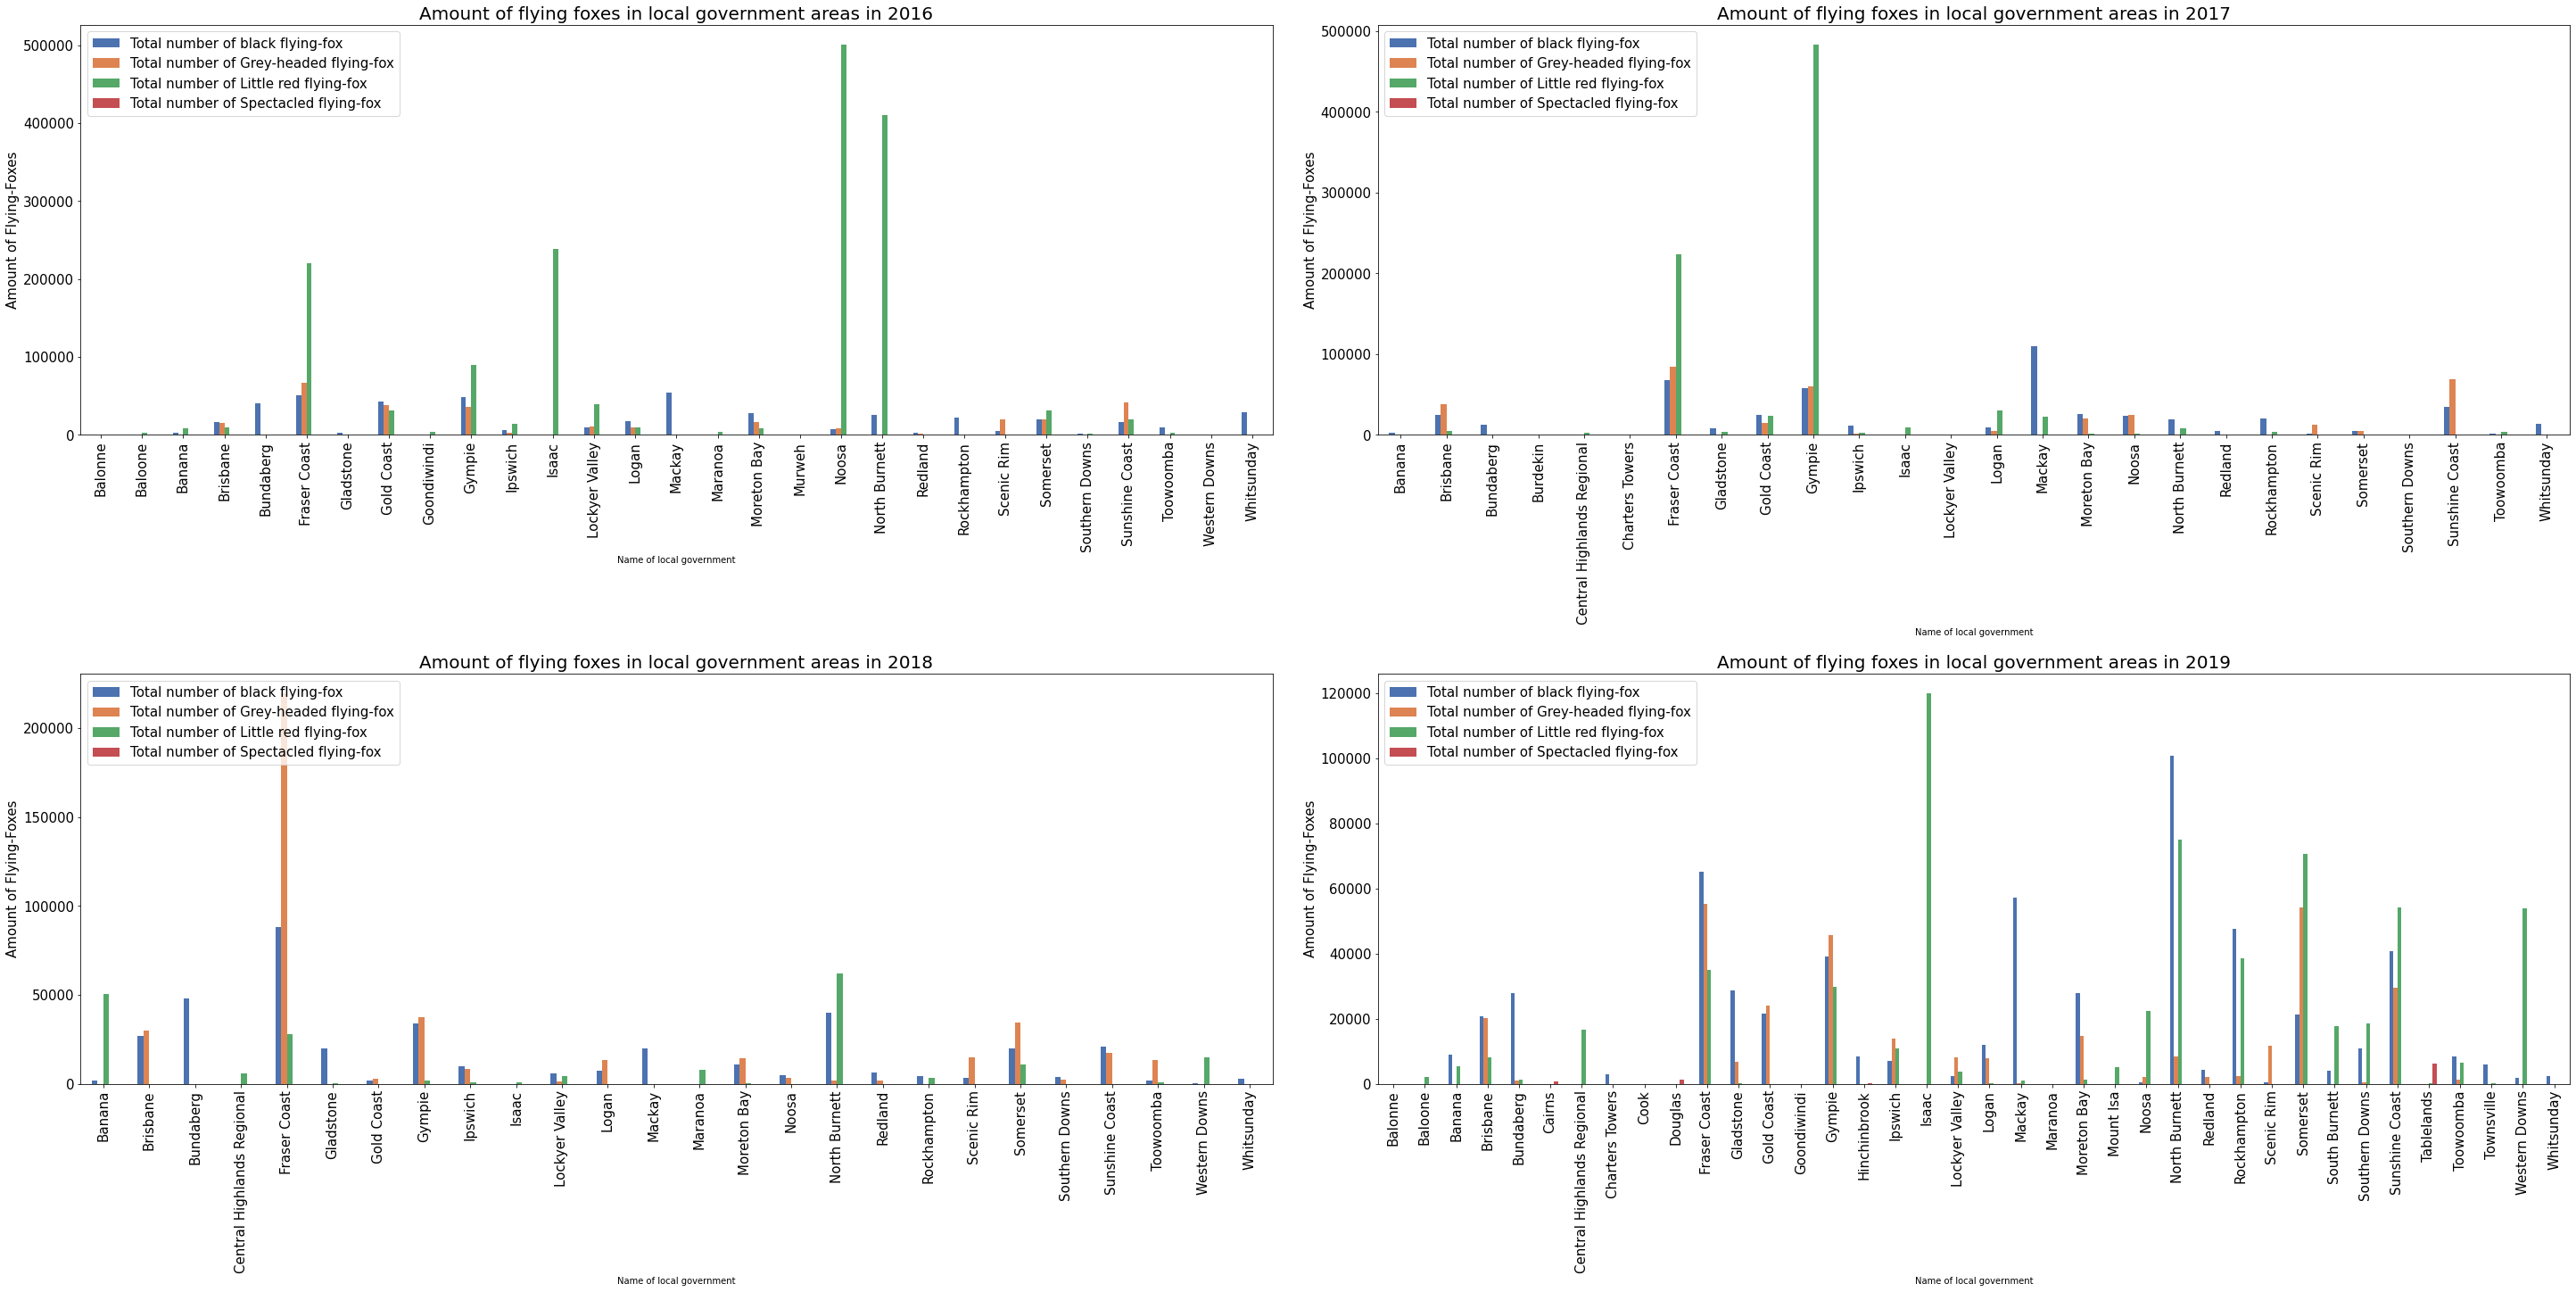

In [119]:
plt.show()

From comparing the graphs you can see that the number of flying foxes dropped from 2016-2019. Another thing I notice is that Central Highlands Regional wasn't a LGA they monitored camps from until 2017. Little reds may of migrated there. Also in 2018 a lot of flying-foxes moved from the Gold Coast, no Little Reds were observed at all.

I also notice that some of the camps had no flying-foxes in them at all from 2016-2019

##### Observations
<ul>
<li>Central Highlands Regional wasn't a LGA they monitored camps from until 2017. Little reds may of migrated there</li>
<li>The numbers from 2016 to 2019 dramatically dropped</li>
<li>2018 a lot of flying-foxes moved from the Gold Coast, no Little Reds were observed at all</li>
<li>Some camps like Balonne and Cook have no flying-foxes observed</li>
</ul>

## No Foxes

In [50]:
campgroup = fox_df.groupby("Name of camp").sum()
onlyfoxes = campgroup[campgroup["Total number of all species"]!=0]
nofox = campgroup[campgroup["Total number of all species"]==0]
totalcampamount = campgroup["Total number of all species"].count()
onlyfoxcampamount = onlyfoxes["Total number of all species"].count()
nofoxcampamount = nofox["Total number of all species"].count()

So i group my dataframe by the name of the camps as because I have multiple years, so of the camps are there twice so i didn't want to count those. I then found all the camps that had the total number of all species equal 0.

In [49]:
print(f"From 2016-2019 they monitored {totalcampamount} known flying-fox camps, but only {onlyfoxcampamount} had flying-foxes in them.")
print(f"So there are {nofoxcampamount} camps that have no foxes in them.")

From 2016-2019 they monitored 294 known flying-fox camps, but only 206 had flying-foxes in them.
So there are 88 camps that have no foxes in them.


#### Any correlation in location?

 wanted to see if there was a correlation between the camps with flying foxes and those without

In [51]:
campwithfoxlist = onlyfoxes.index.tolist()
locationwithfoxlist = []

for camp in campwithfoxlist:
    locate = fox_df_campclean.loc[campgroup.index == camp, ("Longitude", "Latitude")]
    locationwithfoxlist.append(locate)

campwithfox_df = pd.DataFrame()
campwithfox_df = campwithfox_df.append(locationwithfoxlist)

# Creating Point geometry
campwithfox_df["Coordinates"] = list(zip(campwithfox_df.Longitude, campwithfox_df.Latitude))
campwithfox_df["Coordinates"] = campwithfox_df["Coordinates"].apply(Point)

campwithfox_gdf = gp.GeoDataFrame(campwithfox_df, geometry="Coordinates")

In [52]:
campwithnofoxlist = nofox.index.tolist()
locationwithnofoxlist = []

for camp in campwithnofoxlist:
    locatenofoxcoords = fox_df_campclean.loc[campgroup.index == camp, ("Longitude", "Latitude")]
    locationwithnofoxlist.append(locatenofoxcoords)

campwithnofox_df = pd.DataFrame()
campwithnofox_df = campwithnofox_df.append(locationwithnofoxlist)

# Creating Point geometry
campwithnofox_df["Coordinates"] = list(zip(campwithnofox_df.Longitude, campwithnofox_df.Latitude))
campwithnofox_df["Coordinates"] = campwithnofox_df["Coordinates"].apply(Point)

campwithnofox_gdf = gp.GeoDataFrame(campwithnofox_df, geometry="Coordinates")

In [ ]:
fig, ax2 = plt.subplots()

for x, y, label in zip(qld_cities_gdf['Coordinates'].x, qld_cities_gdf['Coordinates'].y, qld_cities_gdf['city']):
    ax2.annotate(label, xy=(x, y), xytext=(20,0), textcoords="offset points", size=8, arrowprops=dict(arrowstyle="->"))
    if label == "Mount Isa":
        qldplot.annotate('Lake Moondarra', xy=(x,y), xycoords='data', xytext=(2, 10), textcoords='offset points', size=6)
        
onlyfox_camp = campwithfox_gdf.plot(ax=ax2, color='#55a868')
nofox_camp = campwithnofox_gdf.plot(ax=ax2, color='#4c72b0')
burbs.boundary.plot(alpha=0.1, edgecolor='black', ax=ax2)

green_patch = mpatches.Patch(color='#55a868', label='Camp with Flying-Foxes')
blue_patch = mpatches.Patch(color='#4c72b0', label='Camp with No Flying-Foxes')
plt.legend(handles=[green_patch, blue_patch])

plt.title("Comparing location of camps with Flying-foxes and Camps Without", fontsize=18)
plt.plot(ax=ax2)

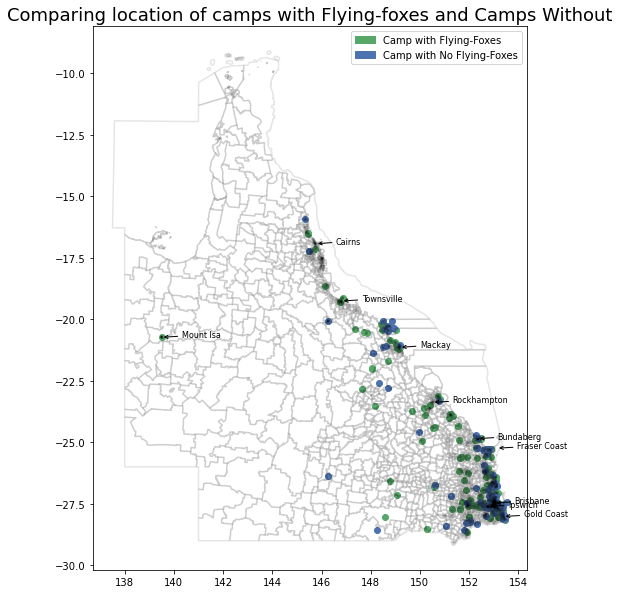

In [78]:
plt.show()

##### Observations
<ul>
<li>Tighter groups of camps</li>
</ul>

The camps got tighter in desnity getting closer to coast line but other than that I couldn't see much correlation

### What species are at each known camps?

So now that I know where flying foxes actually are I wanted to map how they are distributed across the known camps

##### Divided Dataframe Into Needed Columns and Filtered 

In [57]:
blackfox = fox_df[["Total number of black flying-fox", "Latitude", "Longitude"]]
blackfox = blackfox[blackfox["Total number of black flying-fox"] != 0]
blackfox_gdf = gp.GeoDataFrame(blackfox, geometry=gp.points_from_xy(blackfox.Longitude, blackfox.Latitude))

greyfox = fox_df[["Total number of Grey-headed flying-fox", "Latitude", "Longitude"]]
greyfox = greyfox[greyfox["Total number of Grey-headed flying-fox"] != 0]
greyfox_gdf = gp.GeoDataFrame(greyfox, geometry=gp.points_from_xy(greyfox.Longitude, greyfox.Latitude))

redfox = fox_df[["Total number of Little red flying-fox", "Latitude", "Longitude"]]
redfox = redfox[redfox["Total number of Little red flying-fox"] != 0]
redfox_gdf = gp.GeoDataFrame(redfox, geometry=gp.points_from_xy(redfox.Longitude, redfox.Latitude))

specfox = fox_df[["Total number of Spectacled flying-fox", "Latitude", "Longitude"]]
specfox = specfox[specfox["Total number of Spectacled flying-fox"] != 0]
specfox_gdf = gp.GeoDataFrame(specfox, geometry=gp.points_from_xy(specfox.Longitude, specfox.Latitude))

In [ ]:
fig, axspecies = plt.subplots(1,4, figsize=(20,20))
blackfoxax = blackfox_gdf.plot(ax=axspecies[0], color='#55a868')
greyfoxax = greyfox_gdf.plot(ax=axspecies[1], color='#dd8452')
redfoxax = redfox_gdf.plot(ax=axspecies[2], color='#4c72b0')
specfoxax = specfox_gdf.plot(ax=axspecies[3], color='#c44e52')

for i in range(4):
    burbs.boundary.plot(alpha=0.1, edgecolor='black', ax=axspecies[i])
    for x, y, label in zip(qld_cities_gdf['Coordinates'].x, qld_cities_gdf['Coordinates'].y, qld_cities_gdf['city']):
        axspecies[i].annotate(label, xy=(x, y), xytext=(20,0), textcoords="offset points", size=6, arrowprops=dict(arrowstyle="->"))

green_patch = mpatches.Patch(color='#55a868', label='Black Flying Foxes')
yellow_patch = mpatches.Patch(color='#dd8452', label='Grey-headed Flying Foxes')
blue_patch = mpatches.Patch(color='#4c72b0', label='Little red Flying Foxes')
red_patch = mpatches.Patch(color='#c44e52', label='Spectacled Flying Foxes')
plt.legend(handles=[green_patch, yellow_patch, blue_patch, red_patch])

blackfoxax.title.set_text("Location of Black Flying-foxes")
greyfoxax.title.set_text("Location of Grey headed Flying-foxes")
redfoxax.title.set_text("Location of Little Red Flying-foxes")
specfoxax.title.set_text("Location of Spectacled Flying-foxes")

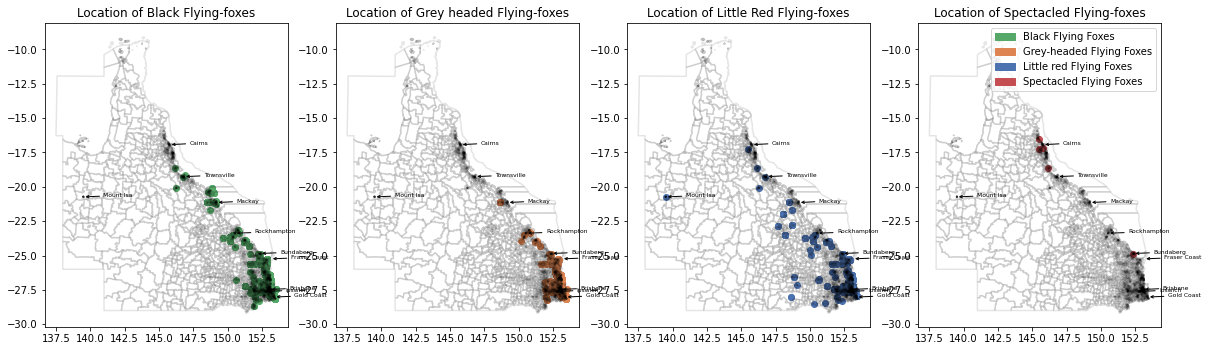

In [89]:
plt.show()

Black flying-foxes and little red flying-foxes are more distributed across the camps. This is probably to the abundance of them compare to the other two species. Grey-headed flying-foxes are mostly in the Brisbane, gold coast areas and less spread out and there are very few spectacles flying fox camps. This is probably due to how little there are of them (change slide)

In [ ]:
amountoffoxes = fox_df[["Total number of black flying-fox", "Total number of Grey-headed flying-fox", "Total number of Little red flying-fox", "Total number of Spectacled flying-fox"]].sum().plot(kind="bar", color=['#55a868','#dd8452', '#4c72b0', '#c44e52'],figsize=(15,8))
amountoffoxes.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
plt.title("Total amount of each species through 2016-2019", fontsize=18)
plt.ylabel("Amount of flying-foxes", fontsize=12)
plt.xticks(rotation=0)

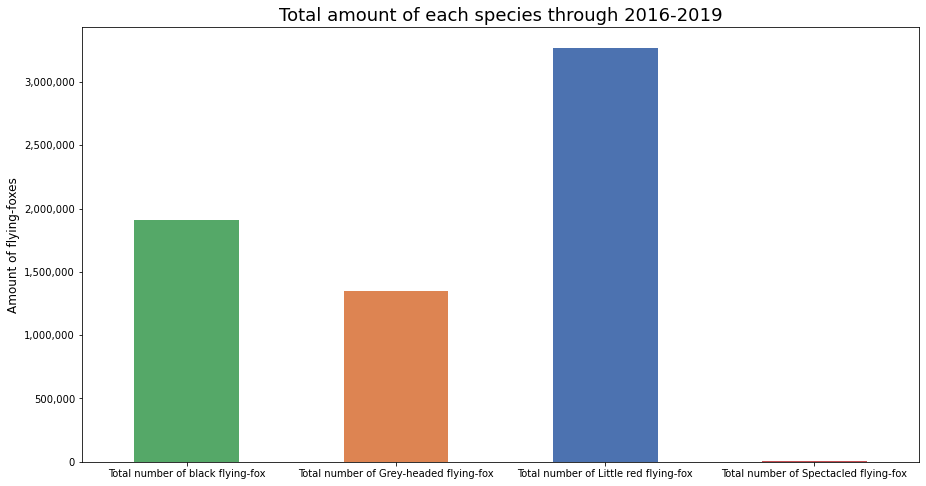

In [65]:
plt.show()

spectacled have a very low number compare to the other 3 species. i wanted to see how the abundance of flying foxes changes over time

##### Abundance of Flying-Foxes Over Time

In [66]:
foxesByDate = fox_df[["Date of survey","Total number of black flying-fox", "Total number of Grey-headed flying-fox", "Total number of Little red flying-fox", "Total number of Spectacled flying-fox"]].groupby(pd.Grouper(key="Date of survey", freq="3M")).sum()
foxesByDate

,Total number of black flying-fox,Total number of Grey-headed flying-fox,Total number of Little red flying-fox,Total number of Spectacled flying-fox
Date of survey,,,,
2016-01-31,0,0.0,3500,0
2016-04-30,233319,111867.0,1071306,0
2016-07-31,98087,75776.0,322714,0
2016-10-31,5422,0.0,209500,0
2017-01-31,134591,110341.0,45168,0
2017-04-30,226647,102242.0,278353,0
2017-07-31,71737,111804.0,31600,0
2017-10-31,74301,63707.0,11840,0
2018-01-31,99648,49657.0,505413,0


In [ ]:
fig, foxdate = plt.subplots(figsize=(20,10))

foxesByDate = fox_df[["Date of survey","Total number of black flying-fox", "Total number of Grey-headed flying-fox", "Total number of Little red flying-fox", "Total number of Spectacled flying-fox"]].groupby(pd.Grouper(key="Date of survey", freq="3M")).sum().plot(ax=foxdate)

foxesByDate.get_yaxis().set_major_formatter(matplotlib.ticker.FuncFormatter(lambda x, p: format(int(x), ',')))
x_line_annotation = dt.datetime(2018, 3, 24)
x_text_annotation = dt.datetime(2018, 2, 24)
foxdate.axvline(x=x_line_annotation, linestyle='dashed', alpha=0.3)
foxdate.text(x=x_text_annotation, y=790000, s='Tropical Cyclone Iris', color='black')


x_line_annotation = dt.datetime(2019, 9, 1)
x_text_annotation = dt.datetime(2019, 8, 1)
foxdate.axvline(x=x_line_annotation, linestyle='dashed', alpha=0.3)
foxdate.text(x=x_text_annotation, y=600000, s='Bushfires', color='black')

x_line_annotation = dt.datetime(2019, 12, 1)
x_text_annotation = dt.datetime(2019, 11, 15)
foxdate.axvline(x=x_line_annotation, linestyle='dashed', alpha=0.3)
foxdate.text(x=x_text_annotation, y=570000, s='Brisbane Heat Wave', color='black')

foxdate.set_ylabel("Amount", fontsize= 10)
foxdate.set_title("Amount of Flying-Foxes Over 2016-2019", fontsize=15)

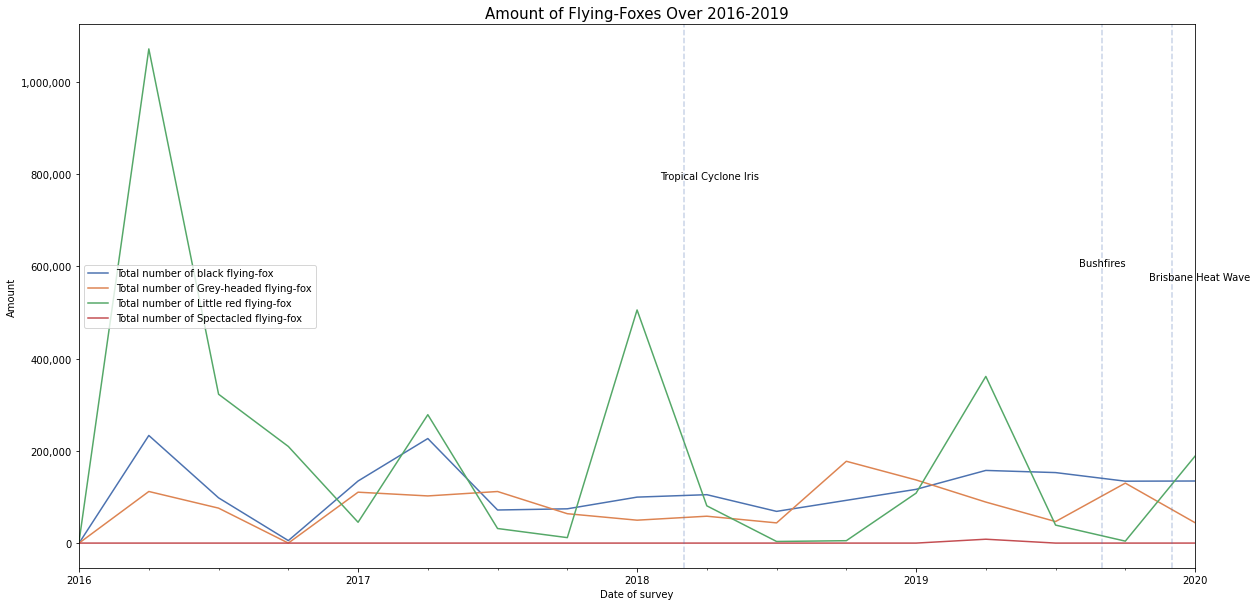

In [120]:
plt.show()

This shows how the number of each species changes over time.

Quite dramatic drops in numbers by the thousands. 
decrease in little red may be due to migration.
extreme heat waves, bushfires, cyclones and droughts can all affect flying-foxes. Bushfires happened around here – so that could be a factor in the decline
Tropical Cyclone iris - may of had a slight affect
From the map early we saw that grey-headed flying-foxes mostly populate brisbane/ gold coast area so a heat wave in brisbane could of caused the decline.
And spectacled flying foxes only have a small number in 2019.

#### Distribution and Abundance of Flying-Fox Numbers

In [ ]:
fig, axtime = plt.subplots(2, 2, sharey=True, sharex=True, figsize=(13,10))

axtime_1 = sns.scatterplot(data=fox_df_2016[fox_df_2016['Total number of all species']>0], ax=axtime[0,0], size="Total number of all species", sizes=(10,200), x='Longitude', y='Latitude')
axtime_1 = sns.kdeplot(data=fox_df_2016, x='Longitude', y='Latitude', fill=True, cmap="coolwarm", alpha=0.3, levels=20, ax=axtime[0,0])

axtime_2 = sns.scatterplot(data=fox_df_2017[fox_df_2017['Total number of all species']>0], ax=axtime[0,1], size="Total number of all species", sizes=(10,200), x='Longitude', y='Latitude')
axtime_2 = sns.kdeplot(data=fox_df_2017, x='Longitude', y='Latitude', fill=True, cmap='coolwarm', alpha=0.3, levels=20, ax=axtime[0,1])

axtime_3 = sns.scatterplot(data=fox_df_2018[fox_df_2018['Total number of all species']>0], ax=axtime[1,0], size="Total number of all species", sizes=(10,200), x='Longitude', y='Latitude')
axtime_3 = sns.kdeplot(data=fox_df_2018, x='Longitude', y='Latitude', fill=True, cmap='coolwarm', alpha=0.3, levels=20, ax=axtime[1,0])

axtime_4 = sns.scatterplot(data=fox_df_2019[fox_df_2019['Total number of all species']>0], ax=axtime[1,1], size="Total number of all species", sizes=(10,200), x='Longitude', y='Latitude')
axtime_4 = sns.kdeplot(data=fox_df_2019, x='Longitude', y='Latitude', fill=True, cmap='coolwarm', alpha=0.3, levels=20, ax=axtime[1,1])


axtime_1.title.set_text('2016')
axtime_2.title.set_text('2017')
axtime_3.title.set_text('2018')
axtime_4.title.set_text('2019')
plt.pause(.2)

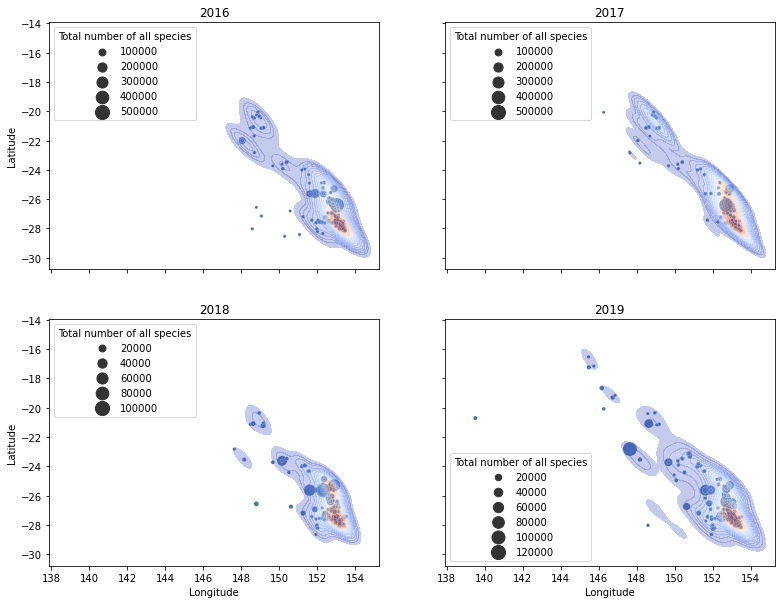

In [111]:
plt.show()

The dots represent the quantity of flying-foxes and the shaded part shows the density of the camps.

2016:
-Had a group of 500,000 
-Camps were mostly together with a few spread out away from the east coast

2017:
-Less camps away from east coast still had a large group but less medium groups and more smaller ones

2018:
-The most condensed.
-Largestest group is now only 100000 instead of the 500,000

2019:
-Camps are more spread out
-Spectacled foxes are counted
-A large group has moved away from dense population and moves further up
-Camp in Mount Isa is added

## Thank you